In [96]:
    import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

In [34]:
df=pd.read_csv(r"Desktop/Salaries.csv")

In [81]:
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.90,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0.00,0.00,2014,San Francisco
148650,148651,Not provided,Not provided,Not Provided,Not Provided,NaN,0.00,2014,San Francisco
148651,148652,Not provided,Not provided,Not Provided,Not Provided,NaN,0.00,2014,San Francisco
148652,148653,Not provided,Not provided,Not Provided,Not Provided,NaN,0.00,2014,San Francisco


In [36]:
df.shape

(148654, 10)

In [37]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Id            148654 non-null  int64  
 1   EmployeeName  148654 non-null  str    
 2   JobTitle      148654 non-null  str    
 3   BasePay       148049 non-null  object 
 4   OvertimePay   148654 non-null  object 
 5   OtherPay      148654 non-null  object 
 6   TotalPay      148654 non-null  float64
 7   Year          148654 non-null  int64  
 8   Agency        148654 non-null  str    
 9   Unnamed: 9    38119 non-null   str    
dtypes: float64(1), int64(2), object(3), str(4)
memory usage: 11.3+ MB


In [38]:
df.isnull().sum()

Id                   0
EmployeeName         0
JobTitle             0
BasePay            605
OvertimePay          0
OtherPay             0
TotalPay             0
Year                 0
Agency               0
Unnamed: 9      110535
dtype: int64

In [39]:
df.describe()

,Id,TotalPay,Year
count,148654.000000,148654.000000,148654.000000
mean,74327.500000,74768.321972,2012.522643
std,42912.857795,50517.005274,1.117538
min,1.000000,-618.130000,2011.000000
25%,37164.250000,36168.995000,2012.000000
50%,74327.500000,71426.610000,2013.000000
75%,111490.750000,105839.135000,2014.000000
max,148654.000000,567595.430000,2014.000000


In [40]:
df.nunique()

Id              148654
EmployeeName    110811
JobTitle          2159
BasePay         109900
OvertimePay      66555
OtherPay         84968
TotalPay        138486
Year                 4
Agency               1
Unnamed: 9           2
dtype: int64

In [41]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
148649    False
148650    False
148651    False
148652    False
148653    False
Length: 148654, dtype: bool

In [42]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,Year,Agency,Unnamed: 9
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,567595.43,2011,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,2011,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,335279.91,2011,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,332343.61,2011,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,326373.19,2011,San Francisco,NaN


In [43]:
df.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,Year,Agency,Unnamed: 9
148649,148650,Roy I Tillery,Custodian,0,0,0,0.00,2014,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,0.00,2014,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,0.00,2014,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,0.00,2014,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0,0,-618.13,-618.13,2014,San Francisco,PT


In [44]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'TotalPay', 'Year', 'Agency', 'Unnamed: 9'],
      dtype='str')

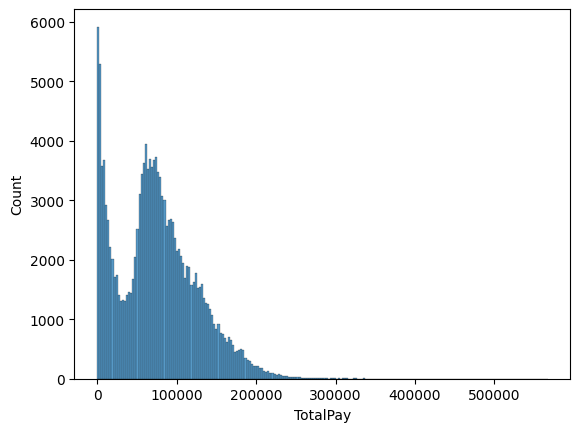

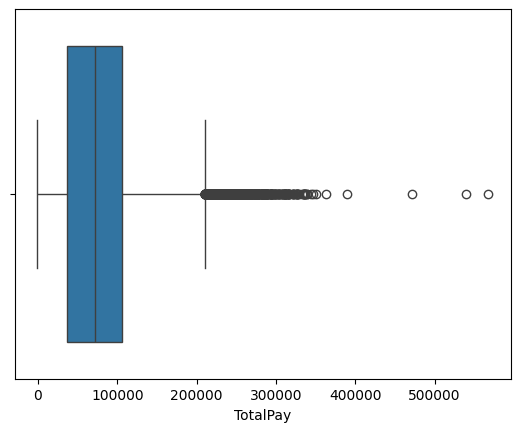

In [45]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df["TotalPay"] = pd.to_numeric(df["TotalPay"], errors="coerce")

sns.histplot(df["TotalPay"].dropna())
plt.show()

sns.boxplot(x=df["TotalPay"].dropna())
plt.show()

In [46]:
df.dropna(subset=['BasePay'],inplace=True)

In [47]:
df = df.drop(columns=['Unnamed: 9'])

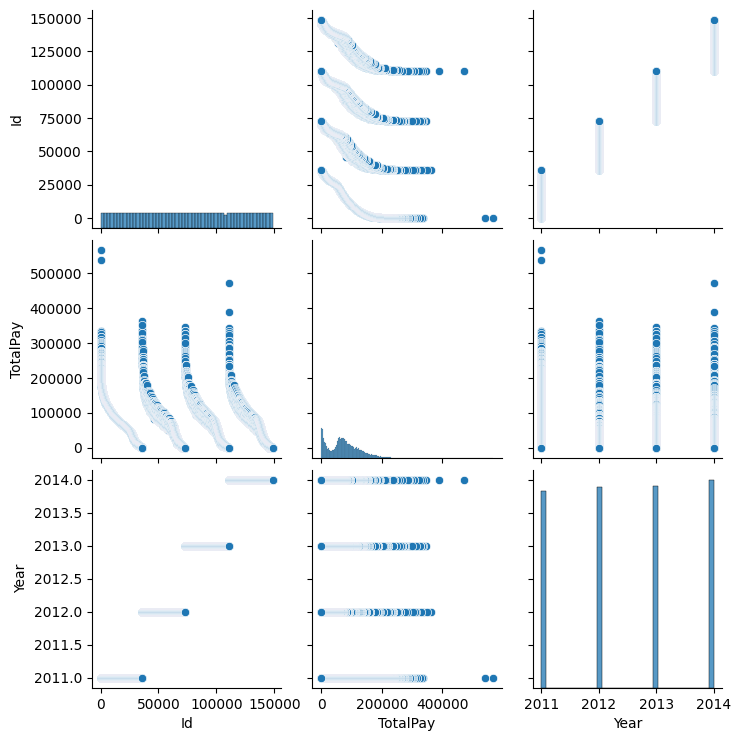

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

In [49]:
df['TotalPay'].value_counts()

TotalPay
 18594.00     82
 0.00         80
 123290.70    56
 132242.50    49
 105489.00    42
              ..
 13.77         1
 13.35         1
 12.89         1
 6.00          1
-618.13        1
Name: count, Length: 138188, dtype: int64

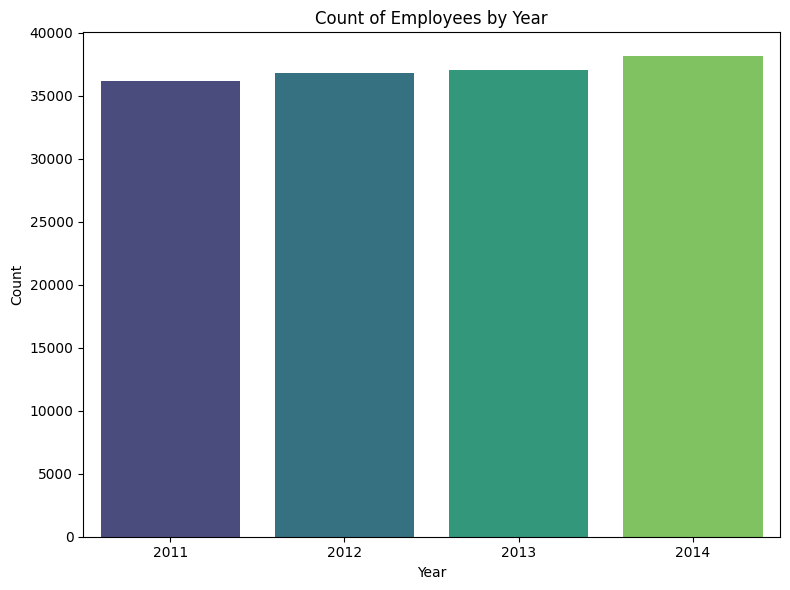

In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Year', palette='viridis')
plt.title('Count of Employees by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

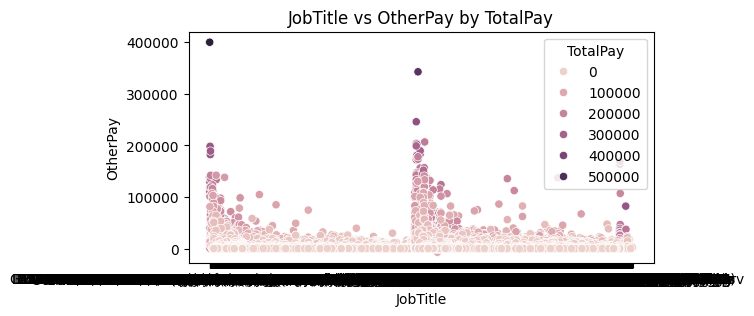

In [51]:
df['OtherPay'] = df['OtherPay'].replace('Not Provided', np.nan)
df['OtherPay'] = pd.to_numeric(df['OtherPay'], errors='coerce')
plt.figure(figsize=(6,3))
sns.scatterplot(data=df, x='JobTitle', y='OtherPay', hue='TotalPay')
plt.title("JobTitle vs OtherPay by TotalPay")
plt.show()

In [52]:
cat = df.select_dtypes(include='object')
cat

,EmployeeName,JobTitle,BasePay,OvertimePay,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,San Francisco
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,San Francisco
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,San Francisco
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,San Francisco
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,San Francisco
...,...,...,...,...,...
148649,Roy I Tillery,Custodian,0,0,San Francisco
148650,Not provided,Not provided,Not Provided,Not Provided,San Francisco
148651,Not provided,Not provided,Not Provided,Not Provided,San Francisco
148652,Not provided,Not provided,Not Provided,Not Provided,San Francisco


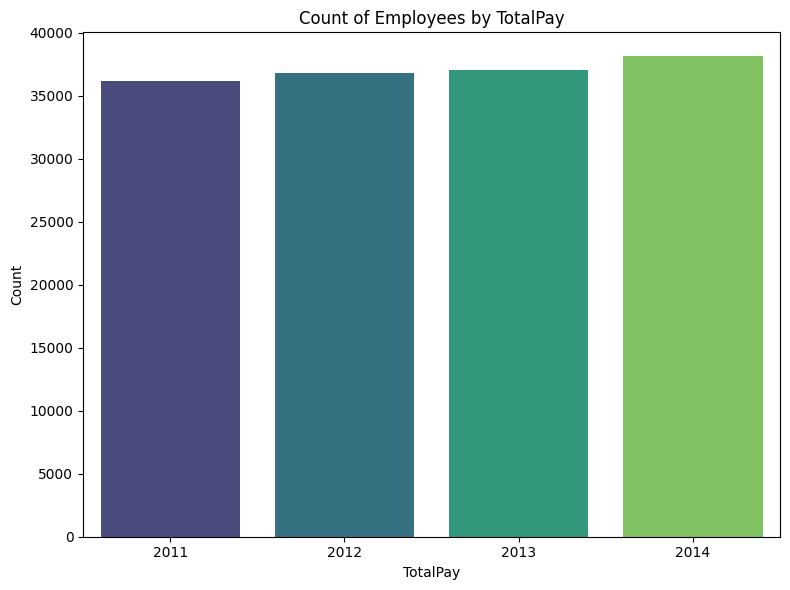

In [61]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Year', palette='viridis')
plt.title('Count of Employees by TotalPay')
plt.xlabel('TotalPay')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

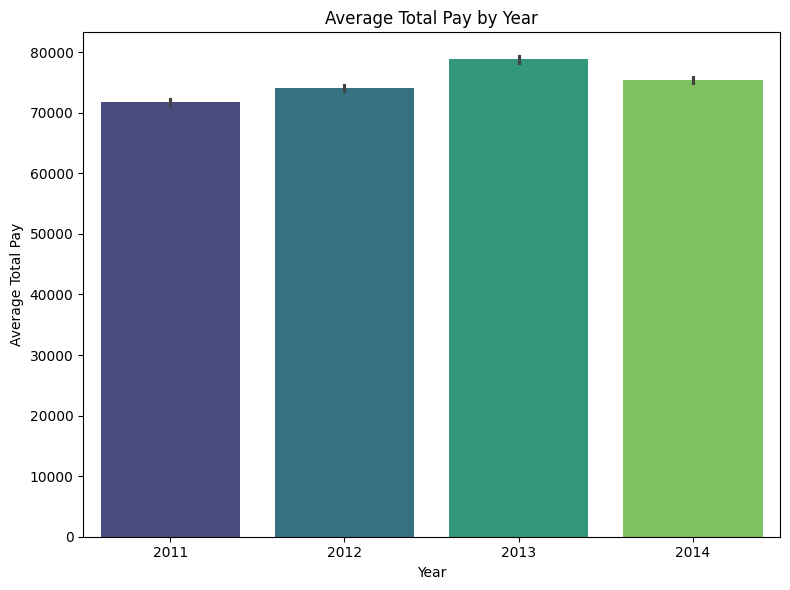

In [62]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Year', y='TotalPay', palette='viridis')
plt.title('Average Total Pay by Year')
plt.xlabel('Year')
plt.ylabel('Average Total Pay')
plt.tight_layout()
plt.show()

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Example: Predict Profit using Sales
X= df[['BasePay']]  # independent variables

y = df['TotalPay']   # dependent variable

In [72]:
#splitting the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
#Select features and target
X = df[['BasePay', 'OvertimePay', 'OtherPay']]
y = df['TotalPay']

In [75]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

In [84]:
model = LinearRegression()
model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [83]:
from sklearn.impute import SimpleImputer
import pandas as pd

imputer = SimpleImputer(strategy="mean")

X_train = pd.DataFrame(
    imputer.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_test = pd.DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)


In [85]:
y_pred = model.predict(X_test)

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_model = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("reg", LinearRegression())
])

poly_model.fit(X_train, y_train)
y_pred = poly_model.predict(X_test)


In [89]:
r2_score(y_test,y_pred)

0.9135369152196796

In [92]:
y_pred1 = model.predict([[212739.13]])
y_pred1

array([239679.38659257])

In [98]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [99]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 8811.71
Mean Squared Error (MSE): 218400852.44
Root Mean Squared Error (RMSE): 14778.39
R-squared (R2): 0.91


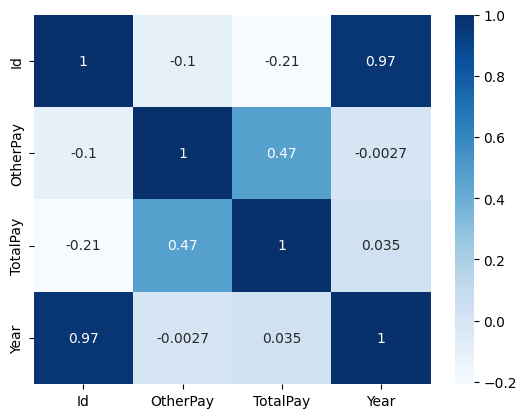

In [101]:
cr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(cr, annot=True, cmap='Blues')
plt.show()

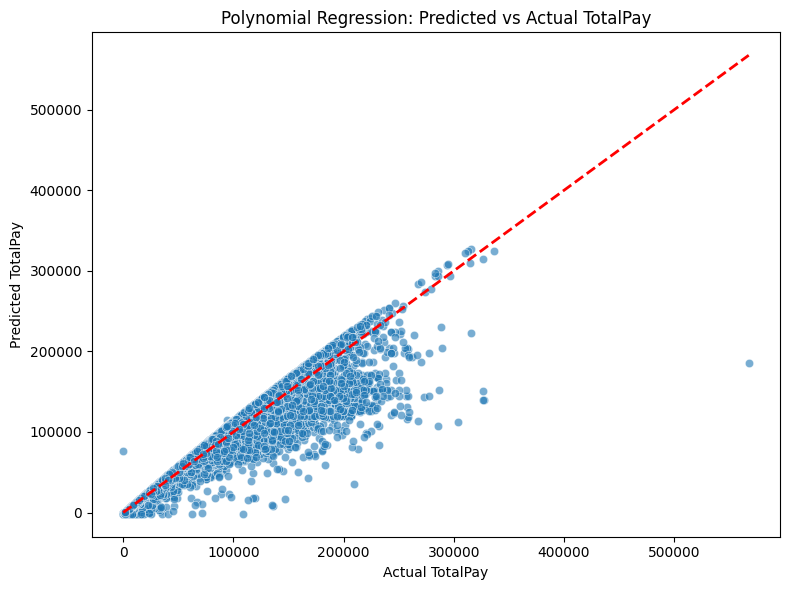

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
plt.title('Polynomial Regression: Predicted vs Actual TotalPay')
plt.xlabel('Actual TotalPay')
plt.ylabel('Predicted TotalPay')
plt.tight_layout()
plt.show()

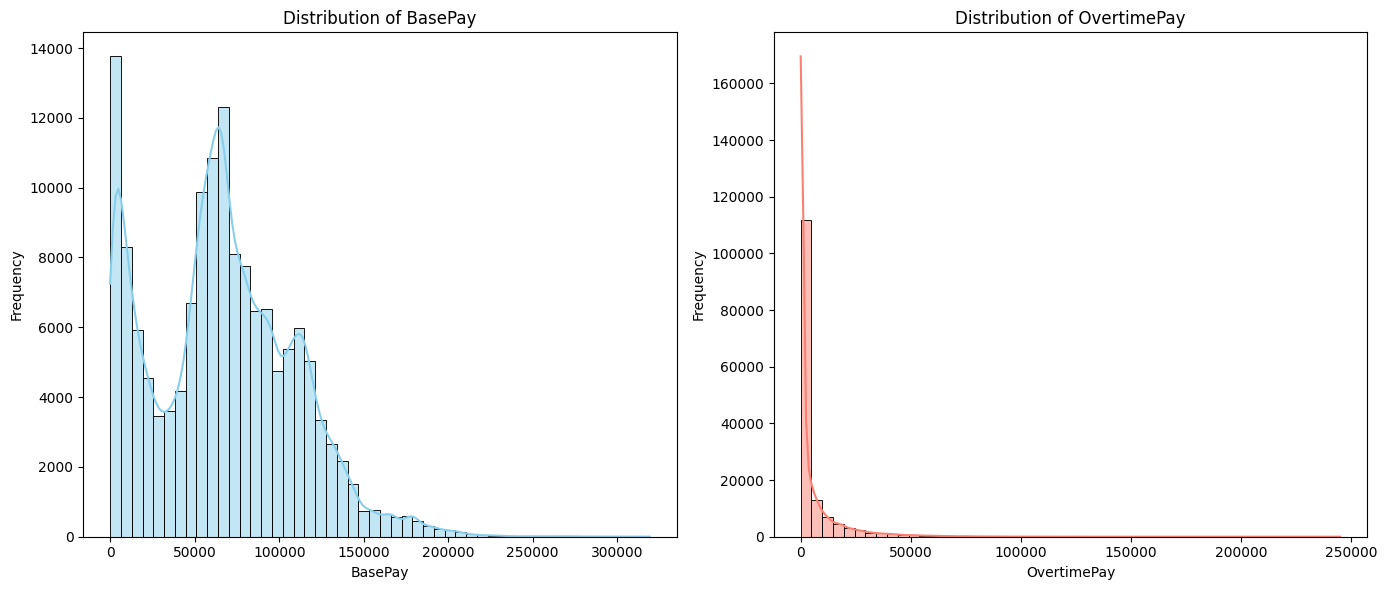

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(14, 6))

# Histogram for BasePay
plt.subplot(1, 2, 1)
sns.histplot(df['BasePay'].apply(pd.to_numeric, errors='coerce'),bins=50, kde=True, color='skyblue')
plt.title('Distribution of BasePay')
plt.xlabel('BasePay')
plt.ylabel('Frequency')

# Histogram for OvertimePay
plt.subplot(1, 2, 2)
sns.histplot(df['OvertimePay'].apply(pd.to_numeric, errors='coerce'),bins=50, kde=True, color='salmon')
plt.title('Distribution of OvertimePay')
plt.xlabel('OvertimePay')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
y_pred=model.predict(x_test)
y_pred=model.predict(

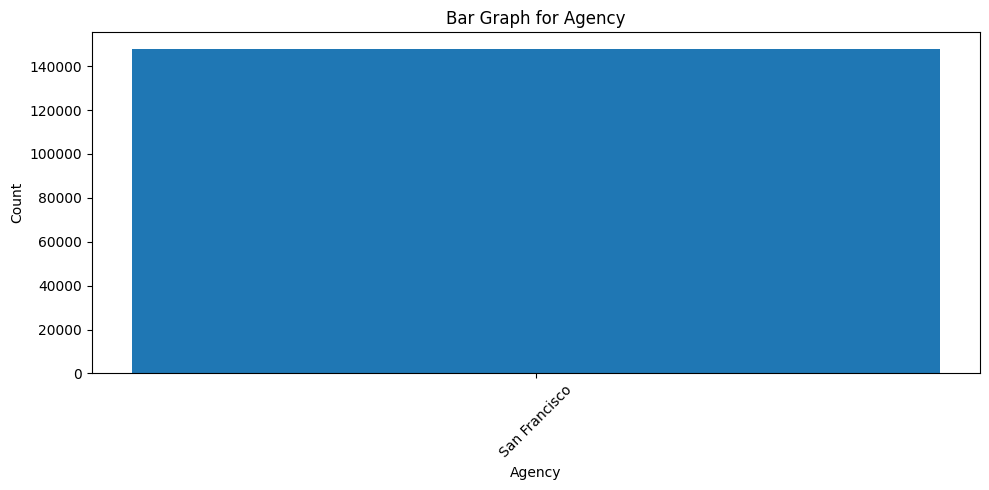

In [106]:
import matplotlib.pyplot as plt

agency_counts = df['Agency'].value_counts()

plt.figure(figsize=(10,5))
plt.bar(agency_counts.index, agency_counts.values)
plt.xlabel('Agency')
plt.ylabel('Count')
plt.title('Bar Graph for Agency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

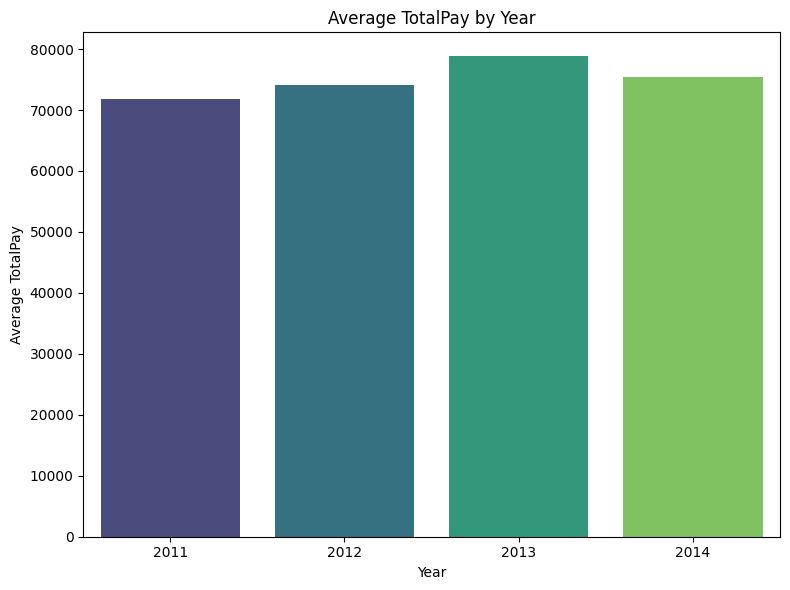

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average TotalPay per Year
year_avg = df.groupby('Year')['TotalPay'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=year_avg, x='Year', y='TotalPay', palette='viridis')
plt.title('Average TotalPay by Year')
plt.xlabel('Year')
plt.ylabel('Average TotalPay')
plt.tight_layout()
plt.show()


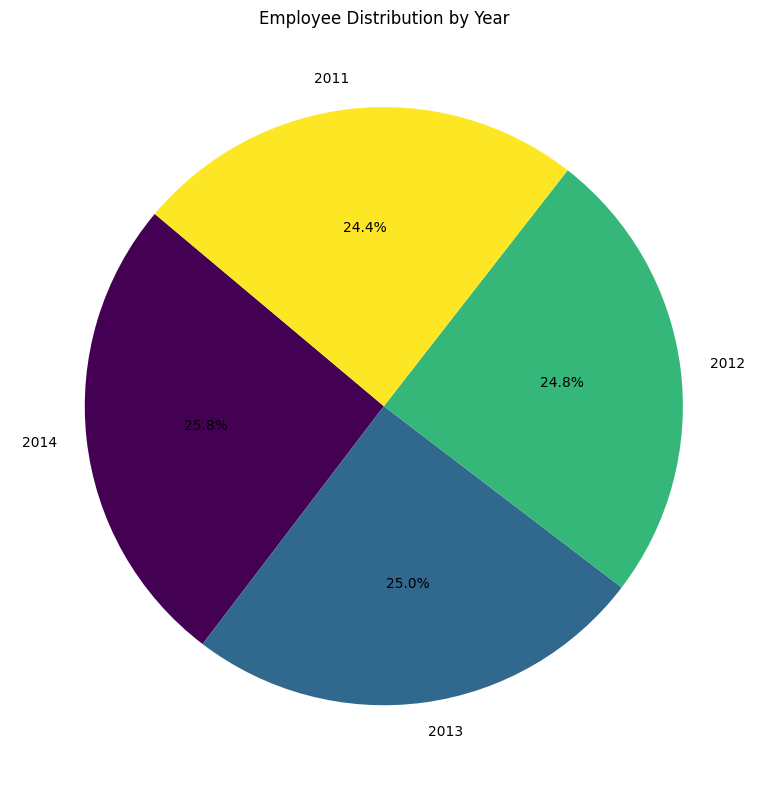

In [108]:
import matplotlib.pyplot as plt

# Count number of employees per Year
year_counts = df['Year'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis(np.linspace(0, 1, len(year_counts))))
plt.title('Employee Distribution by Year')
plt.tight_layout()
plt.show()

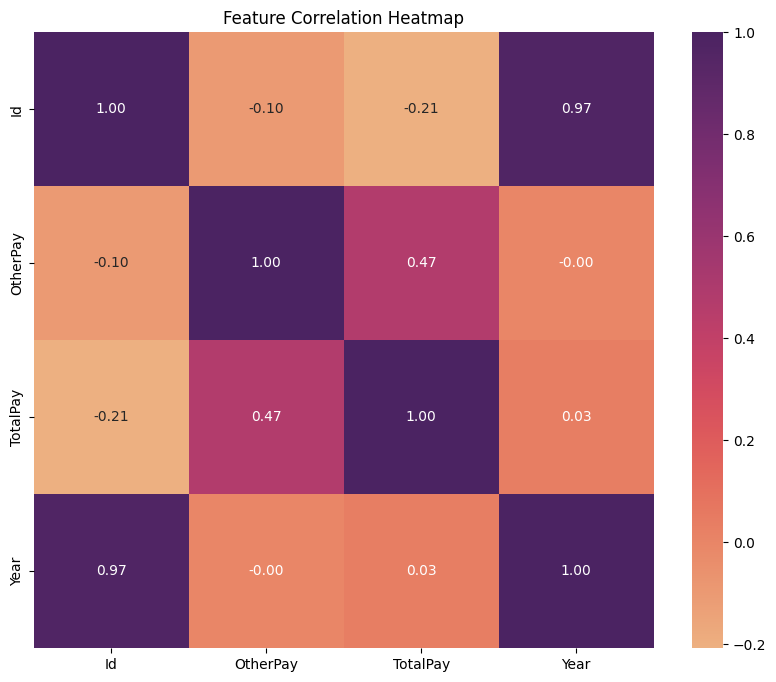

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Calculate correlation matrix
corr_matrix = numeric_df.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='flare', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()